# Import Packages

In [2]:
from torchvision import datasets
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import TensorDataset, DataLoader
import torchsummary
import torchvision
import torch

In [3]:
from IPython.display import Image

# Load Dataset

- Image Path(train) : /dataset/train
- Image Path(test) : /dataset/test
- Image Path(valid) : /dataset/valid
- Input Image resize : Height X Width  32 X 32
- Batch Size : 100

In [4]:
#Defining plotting settings
plt.rcParams['figure.figsize'] = 14, 6


#Initializing normalizing transform for the dataset
normalize_transform = torchvision.transforms.Compose(?)


train_dataset = datasets.ImageFolder(?)
    
test_dataset = datasets.ImageFolder(?)

valid_dataset = datasets.ImageFolder(?)



#Generating data loaders from the corresponding datasets
train_loader = DataLoader(?)
test_loader = DataLoader(?)
valid_loader = DataLoader(?)

In [ ]:
#Defining plotting settings
plt.rcParams['figure.figsize'] = 14, 6


#Initializing normalizing transform for the dataset
normalize_transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize((32, 32)),
    torchvision.transforms.ToTensor()])


train_dataset = datasets.ImageFolder(
    root="./dataset/train", transform=normalize_transform)
    
test_dataset = datasets.ImageFolder(
    root="./dataset/test",transform=normalize_transform)


valid_dataset = datasets.ImageFolder(
    root="./dataset/valid",transform=normalize_transform)



#Generating data loaders from the corresponding datasets
batch_size = 100
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=True)

In [5]:
dataiter = iter(train_loader)

In [6]:
images, labels = dataiter.next()

In [7]:
labels.shape

torch.Size([100])

# Visualize our data

(-0.5, 165.5, 66.5, -0.5)

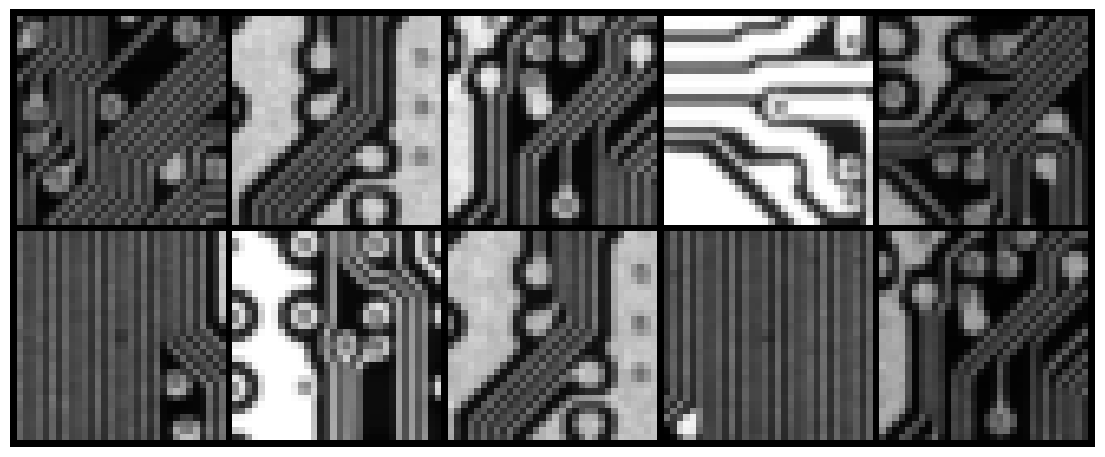

In [8]:
#Plotting 25 images from the 1st batch 
dataiter = iter(train_loader)
images, labels = dataiter.next()
plt.imshow(np.transpose(torchvision.utils.make_grid(
  images[:10], normalize=True, padding=1, nrow=5).numpy(), (1, 2, 0)))
plt.axis('off')

# Check Classes

Text(0, 0.5, 'Number of training instances')

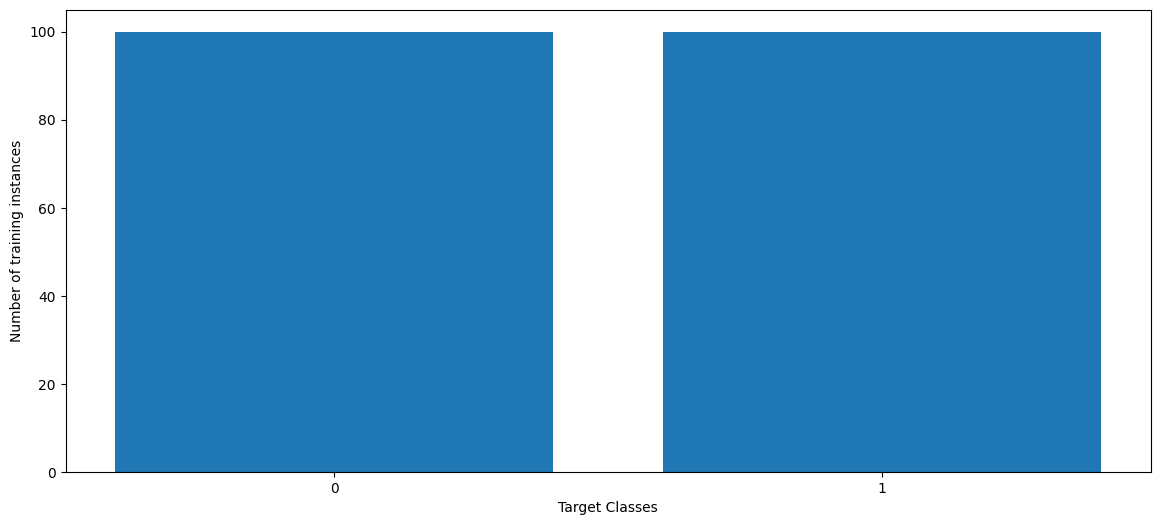

In [43]:
classes = []
for batch_idx, data in enumerate(train_loader, 0):
    x, y = data 
    classes.extend(y.tolist())
      
#Calculating the unique classes and the respective counts and plotting them
unique, counts = np.unique(classes, return_counts=True)
names = list(test_dataset.class_to_idx.keys())
plt.bar(names, counts)
plt.xlabel("Target Classes")
plt.ylabel("Number of training instances")

## CNN Archetecture
![nn](asset/simpleCNN_torch1.JPG)



 # Build CNN

## Problem 2
- Input size : 32 X 32 X 3
- Class : 2

In [ ]:
class CNN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.model = torch.nn.Sequential(
            #Input = 3 x 32 x 32, Output = 32 x 32 x 32
            torch.nn.Conv2d(in_channels = ?, out_channels = ?, kernel_size = ?, padding = ?), 
            torch.nn.ReLU(),
            #Input = 32 x 32 x 32, Output = 32 x 16 x 16
            torch.nn.MaxPool2d(kernel_size=?),
  
            #Input = 32 x 16 x 16, Output = 64 x 16 x 16
            torch.nn.Conv2d(in_channels = ?, out_channels = ?, kernel_size = 3, padding = ?),
            torch.nn.ReLU(),
            #Input = 64 x 16 x 16, Output = 64 x 8 x 8
            torch.nn.MaxPool2d(kernel_size=?),
              
            #Input = 64 x 8 x 8, Output = 64 x 8 x 8
            torch.nn.Conv2d(in_channels = ?, out_channels = ?, kernel_size = 3, padding = ?),
            torch.nn.ReLU(),
            #Input = 64 x 8 x 8, Output = 64 x 4 x 4
            torch.nn.MaxPool2d(kernel_size=?),
  
            torch.nn.Flatten(),
            torch.nn.Linear(?, ?),
            torch.nn.ReLU(),
            torch.nn.Linear(?, ?)
        )
  
    def forward(self, x):
        return self.model(x)

In [59]:
class CNN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.model = torch.nn.Sequential(
            #Input = 3 x 32 x 32, Output = 32 x 32 x 32
            torch.nn.Conv2d(in_channels = 3, out_channels = 32, kernel_size = 2, padding = 1), 
            torch.nn.ReLU(),
            #Input = 32 x 32 x 32, Output = 32 x 16 x 16
            torch.nn.MaxPool2d(kernel_size=2),
  
            #Input = 32 x 16 x 16, Output = 64 x 16 x 16
            torch.nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = 3, padding = 1),
            torch.nn.ReLU(),
            #Input = 64 x 16 x 16, Output = 64 x 8 x 8
            torch.nn.MaxPool2d(kernel_size=2),
              
            #Input = 64 x 8 x 8, Output = 64 x 8 x 8
            torch.nn.Conv2d(in_channels = 64, out_channels = 64, kernel_size = 3, padding = 1),
            torch.nn.ReLU(),
            #Input = 64 x 8 x 8, Output = 64 x 4 x 4
            torch.nn.MaxPool2d(kernel_size=2),
  
            torch.nn.Flatten(),
            torch.nn.Linear(64*4*4, 512),
            torch.nn.ReLU(),
            torch.nn.Linear(512, 2)
        )
  
    def forward(self, x):
        return self.model(x)

In [60]:
device = 'cpu'
model = CNN().to(device)
torchsummary.summary(model,(3,32,32), device=device)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 33, 33]             416
              ReLU-2           [-1, 32, 33, 33]               0
         MaxPool2d-3           [-1, 32, 16, 16]               0
            Conv2d-4           [-1, 64, 16, 16]          18,496
              ReLU-5           [-1, 64, 16, 16]               0
         MaxPool2d-6             [-1, 64, 8, 8]               0
            Conv2d-7             [-1, 64, 8, 8]          36,928
              ReLU-8             [-1, 64, 8, 8]               0
         MaxPool2d-9             [-1, 64, 4, 4]               0
          Flatten-10                 [-1, 1024]               0
           Linear-11                  [-1, 512]         524,800
             ReLU-12                  [-1, 512]               0
           Linear-13                    [-1, 2]           1,026
Total params: 581,666
Trainable params:

In [41]:
print(model)

CNN(
  (model): Sequential(
    (0): Conv2d(3, 32, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Flatten(start_dim=1, end_dim=-1)
    (10): Linear(in_features=1024, out_features=512, bias=True)
    (11): ReLU()
    (12): Linear(in_features=512, out_features=2, bias=True)
  )
)


# Train your Model for classification.

Epoch 1/50: Training loss = 0.6991462409496307
Epoch 2/50: Training loss = 0.6931577920913696
Epoch 3/50: Training loss = 0.6892090737819672
Epoch 4/50: Training loss = 0.6856605708599091
Epoch 5/50: Training loss = 0.683571457862854
Epoch 6/50: Training loss = 0.6756262183189392
Epoch 7/50: Training loss = 0.666727215051651
Epoch 8/50: Training loss = 0.6523745357990265
Epoch 9/50: Training loss = 0.6392771005630493
Epoch 10/50: Training loss = 0.6061302125453949
Epoch 11/50: Training loss = 0.5792628824710846
Epoch 12/50: Training loss = 0.578745037317276
Epoch 13/50: Training loss = 0.550564169883728
Epoch 14/50: Training loss = 0.5265949964523315
Epoch 15/50: Training loss = 0.5144209265708923
Epoch 16/50: Training loss = 0.5089380890130997
Epoch 17/50: Training loss = 0.5014937222003937
Epoch 18/50: Training loss = 0.4933429956436157
Epoch 19/50: Training loss = 0.4835565388202667
Epoch 20/50: Training loss = 0.4893593490123749
Epoch 21/50: Training loss = 0.4797951430082321
Epoch

Text(0, 0.5, 'Training loss')

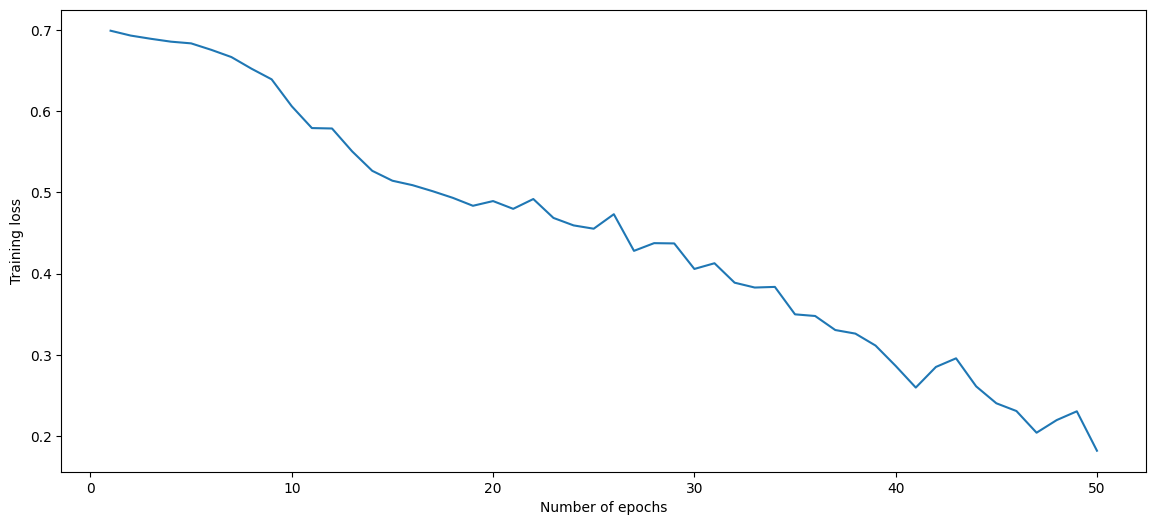

In [42]:
#Selecting the appropriate training device
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = CNN().to(device)
  
#Defining the model hyper parameters
num_epochs = 50
learning_rate = 0.001
weight_decay = 0.01
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
  
#Training process begins
train_loss_list = []
for epoch in range(num_epochs):
    print(f'Epoch {epoch+1}/{num_epochs}:', end = ' ')
    train_loss = 0
      
    #Iterating over the training dataset in batches
    model.train()
    for i, (images, labels) in enumerate(train_loader):          
        #Extracting images and target labels for the batch being iterated
        images = images.to(device)
        labels = labels.to(device)  
        #Calculating the model output and the cross entropy loss
        outputs = model(images)
        loss = criterion(outputs, labels)  
        #Updating weights according to calculated loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
      
    #Printing loss for each epoch
    train_loss_list.append(train_loss/len(train_loader))
    print(f"Training loss = {train_loss_list[-1]}")   
      
#Plotting loss for all epochs
plt.plot(range(1,num_epochs+1), train_loss_list)
plt.xlabel("Number of epochs")
plt.ylabel("Training loss")

# Result

In [16]:
test_acc=0
model.eval()
  
with torch.no_grad():
    #Iterating over the training dataset in batches
    for i, (images, labels) in enumerate(test_loader):
          
        images = images.to(device)
        y_true = labels.to(device)
          
        #Calculating outputs for the batch being iterated
        outputs = model(images)
        
        #Calculated prediction labels from models
        _, y_pred = torch.max(outputs.data, 1)
          
        #Comparing predicted and true labels
        test_acc += (y_pred == y_true).sum().item()
      
    print(f"Test set accuracy = {100 * test_acc / len(test_dataset)} %")

Test set accuracy = 62.5 %


(-0.5, 165.5, 33.5, -0.5)

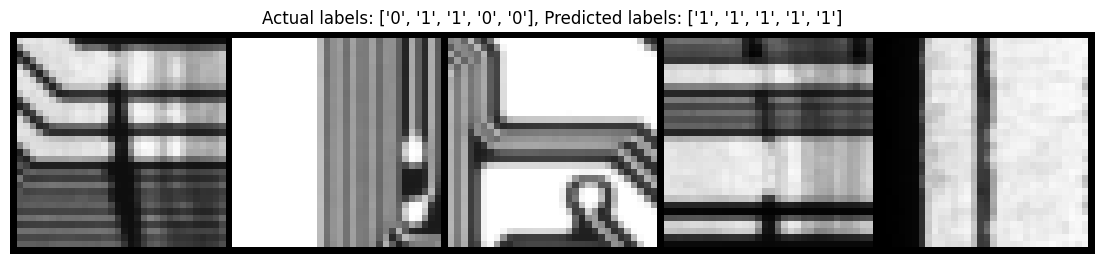

In [17]:
#Generating predictions for 'num_images' amount of images from the last batch of test set
num_images = 5
y_true_name = [names[y_true[idx]] for idx in range(num_images)] 
y_pred_name = [names[y_pred[idx]] for idx in range(num_images)] 
  
#Generating the title for the plot
title = f"Actual labels: {y_true_name}, Predicted labels: {y_pred_name}"
  
#Finally plotting the images with their actual and predicted labels in the title
plt.imshow(np.transpose(torchvision.utils.make_grid(images[:num_images].cpu(), normalize=True, padding=1).numpy(), (1, 2, 0)))
plt.title(title)
plt.axis("off")